Most of the code written by Maciej Arciuch durig Google ASL training. ** Can you predict credit card fraudlet transaction? **

In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('creditcard/creditcard.csv')

feature_cols = ['Time'] + ['V%s' % i for i in range(1, 29)] + ['Amount']
print('feature cols: ', feature_cols)

#
# why normalize values?
#
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = feature_cols + ['Class']

X = df_normalized[feature_cols]
y = df_normalized['Class']

df_fraud = df_normalized[df_normalized['Class'] == 1.0]
df_legal = df_normalized[df_normalized['Class'] == 0.0]

feature cols:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# Visual data exploration

In [3]:
df_legal.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,0.548858,0.274804,0.000000,0.313846,0.490248,0.806363,1.000000
V1,284315.0,0.958434,0.032785,0.000000,0.942706,0.958634,0.980655,1.000000
V2,284315.0,0.767192,0.017264,0.000000,0.760933,0.767934,0.775704,0.966707
V3,284315.0,0.837625,0.025290,0.000000,0.822086,0.840570,0.855234,1.000000
V4,284315.0,0.251582,0.062031,0.000000,0.214247,0.250937,0.284628,1.000000
V5,284315.0,0.765753,0.009135,0.000000,0.761075,0.765356,0.769837,1.000000
V6,284315.0,0.263044,0.013371,0.000000,0.255310,0.260274,0.267038,1.000000
V7,284315.0,0.265414,0.007181,0.071840,0.261996,0.265606,0.268834,1.000000
V8,284315.0,0.785375,0.012457,0.000000,0.783147,0.785622,0.788885,0.986077
V9,284315.0,0.462934,0.037527,0.246075,0.440719,0.461059,0.483388,1.000000


In [4]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,0.467306,0.877224,0.805495,0.715537,0.453275,0.744502,0.248967,0.231430,0.791507,0.373865,...,0.572983,0.510686,0.664835,0.368068,0.580233,0.433885,0.419659,0.314659,0.004757,1.0
std,0.276838,0.115246,0.045279,0.123222,0.127372,0.036167,0.018682,0.043904,0.072919,0.086151,...,0.062375,0.069723,0.023459,0.069474,0.044749,0.077048,0.025412,0.011106,0.009991,0.0
min,0.002350,0.439247,0.678603,0.298431,0.193714,0.616903,0.198611,0.000000,0.345109,0.000000,...,0.193973,0.095452,0.379490,0.108959,0.309503,0.237162,0.282444,0.275190,0.000000,1.0
25%,0.238677,0.855749,0.779796,0.687634,0.357125,0.733451,0.237869,0.216830,0.783290,0.329383,...,0.562153,0.485131,0.660352,0.323374,0.560261,0.383073,0.416141,0.310915,0.000039,1.0
50%,0.437338,0.918498,0.795936,0.749467,0.437100,0.755464,0.248697,0.246870,0.792052,0.386692,...,0.571025,0.512290,0.664347,0.374042,0.582867,0.426154,0.423800,0.316094,0.000360,1.0
75%,0.743570,0.951172,0.819712,0.797971,0.533364,0.767161,0.258865,0.259593,0.804317,0.435640,...,0.581543,0.538836,0.670013,0.420682,0.603532,0.490254,0.431758,0.320859,0.004122,1.0
max,0.985856,0.994520,1.000000,0.876407,0.788963,0.840408,0.328111,0.300705,1.000000,0.578303,...,1.000000,0.900117,0.746612,0.529304,0.701859,0.873881,0.472851,0.349233,0.082747,1.0


In [5]:
import matplotlib.pyplot as plt

def plot_histograms(df_pos, df_neg, feature_cols):
  for col in feature_cols:
    fig, ax = plt.subplots()
    ax.hist(df_neg[col], color='blue', alpha=0.2, bins=20, normed=True)
    ax.hist(df_pos[col], color='red', alpha=0.5, bins=10, normed=True)

    ax.set(title=col)
    ax.margins(0.05)
    ax.set_ylim(bottom=0)
    plt.show() 

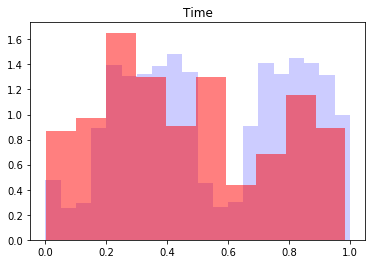

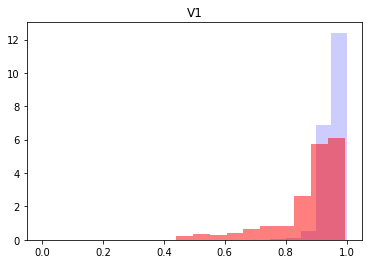

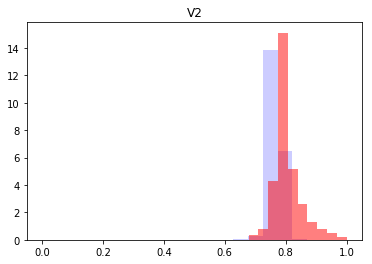

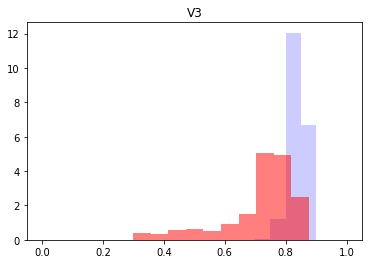

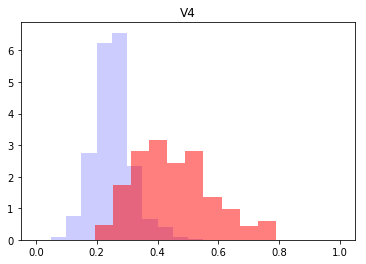

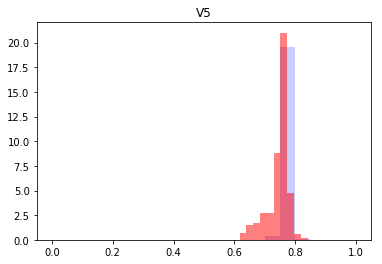

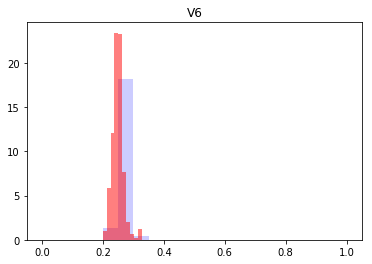

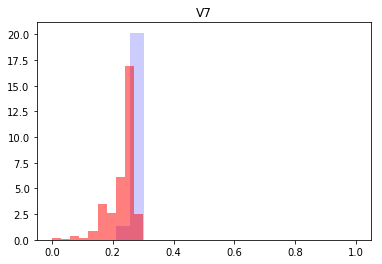

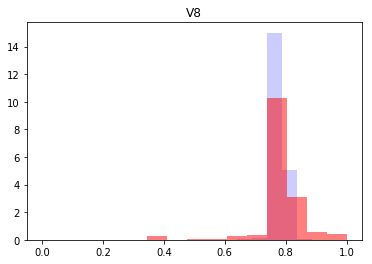

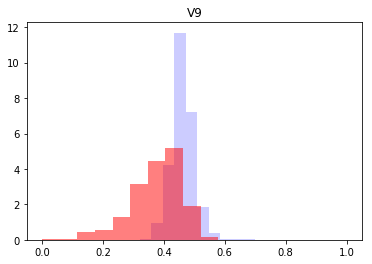

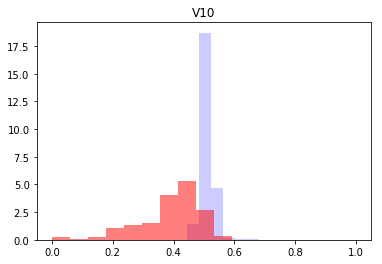

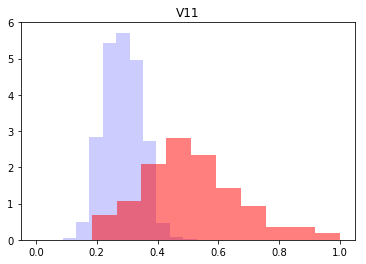

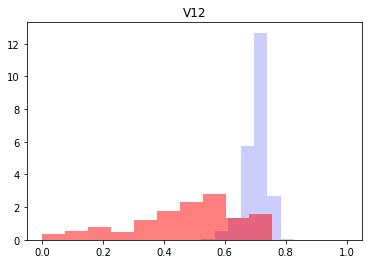

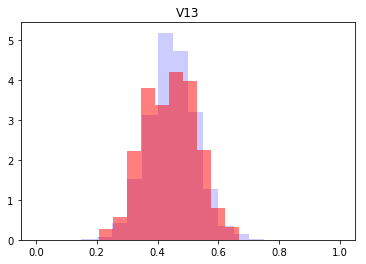

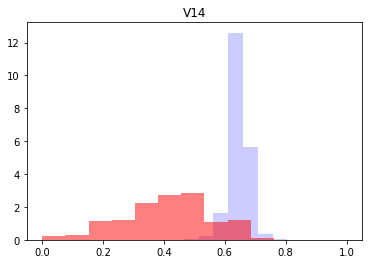

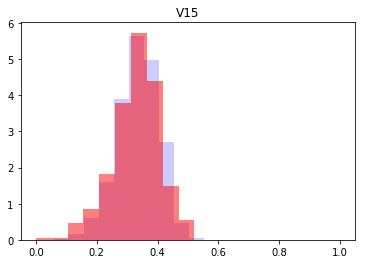

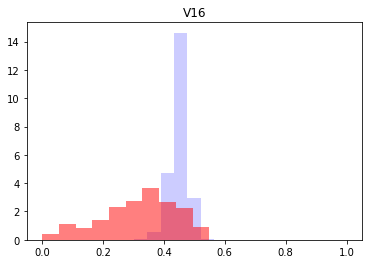

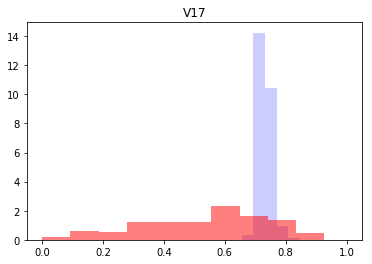

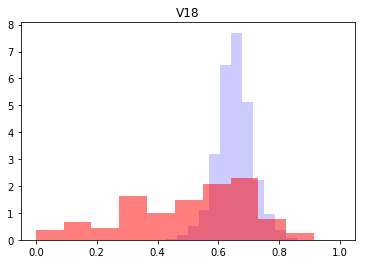

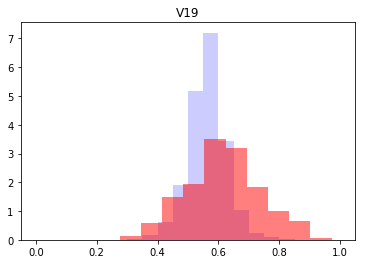

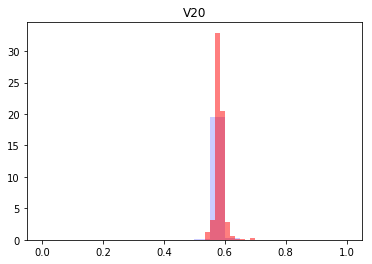

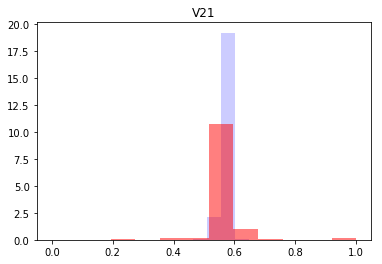

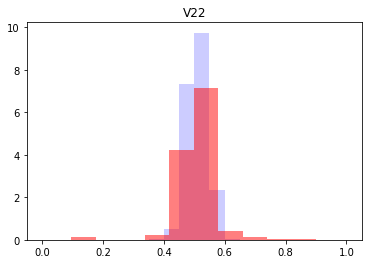

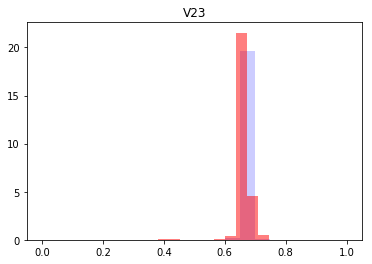

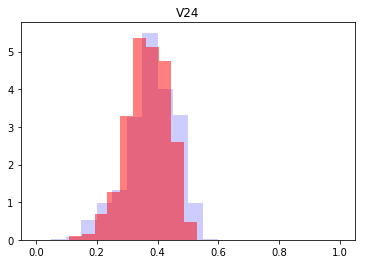

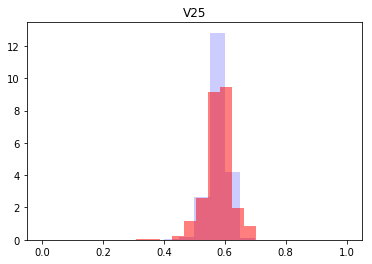

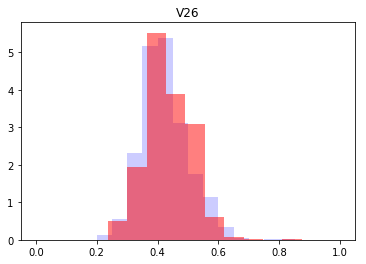

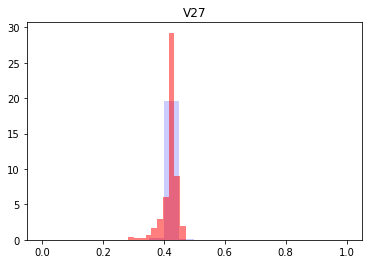

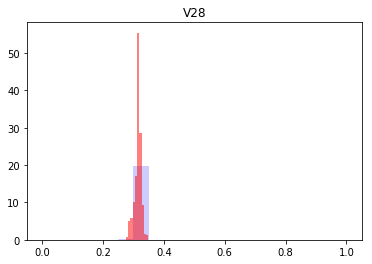

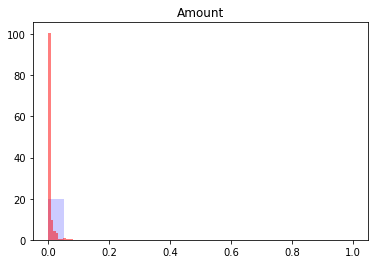

In [6]:
plot_histograms(df_fraud, df_legal, feature_cols=feature_cols)

Inna wersja wykresów korelacji.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histograms_tight(df, feature_cols, height=10):
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    rows = int(len(feature_cols) // 3 + (bool(len(feature_cols) % 3) & 1))
    f, axes = plt.subplots(rows, 3, figsize=(15, height), sharex=False)
    axes = axes.flatten()

    for i, col in enumerate(feature_cols):    
        sns.distplot(df_legal[col], color="green", bins=50, ax=axes[i])
        sns.distplot(df_fraud[col], color="red", bins=50, ax=axes[i])
    plt.setp(axes, yticks=[])
    plt.tight_layout()

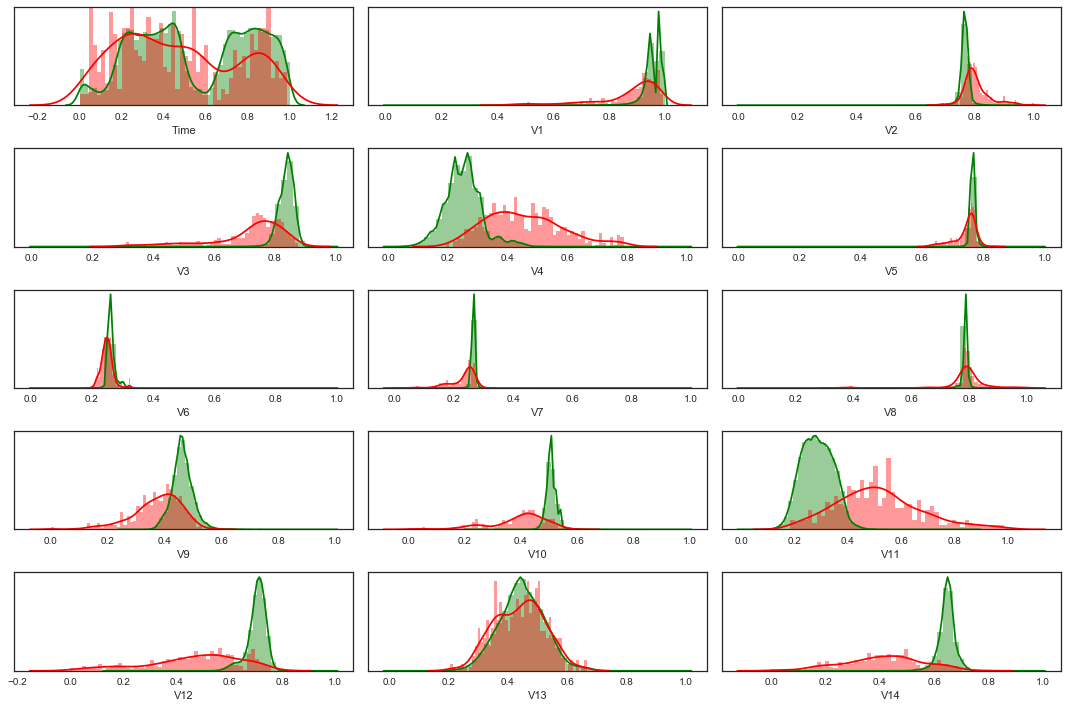

In [8]:
plot_histograms_tight(df, feature_cols[:15])

# Feature selection

In [9]:
from sklearn.model_selection import train_test_split

# based on possible corelations visible in charts
important_cols = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount']
X_important = X[important_cols]
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X_important, y, test_size=0.2, random_state=0)
print("Included columns are: {}".format(important_cols))

Included columns are: ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount']


# Experiments

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

W niektórych przypadkach "goły" ficzer nie jest w stanie oddać zależności w modelowanym zbiorze, ale nawet prosty model liniowy jest w stanie poradzić sobie z bardziej skomplikowanymi funkcjami jeżeli wprowadzimy złączenia cech.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36792&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false -- spróbujcie troche pokombinować z tym co wchodzi do sieci neuronowej

In [20]:
def make_crosses(X_train, X_validation, degree=2):
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_validation_poly = poly.transform(X_validation)
  return X_train_poly, X_validation_poly

# Linear Regression in SciKit-Learn, with poly-features

In [21]:
from sklearn.linear_model import LogisticRegression

def sk_lr_scores():
  for i in range (0, 25):
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)
    
    X_train_poly, X_validation_poly = make_crosses(X_train, X_validation)
    
    classifier = LogisticRegression().fit(X_train_poly, y_train)
    y_predicted = classifier.predict(X_validation_poly)

    yield f1_score(y_validation, y_predicted, average='macro'), average_precision_score(y_validation, y_predicted)
    
pd.DataFrame([i for i in sk_lr_scores()], columns=['F1', 'AP']).describe()

,F1,AP
count,25.000000,25.000000
mean,0.849288,0.510241
std,0.017562,0.045967
min,0.817642,0.426832
25%,0.833131,0.474348
50%,0.846741,0.502148
75%,0.862307,0.540496
max,0.880241,0.597646


# Linear Regression in TensorFlow

Tensorflow używamy gdy trzeba przemielić dane ktore nie mieszczą się w pamięci.

In [4]:
import tensorflow as tf
import tensorflow.contrib.learn as estimators
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
from tensorflow.contrib.learn.python.learn.learn_io import pandas_input_fn
import shutil

def create_feature_cols():
  return [tflayers.real_valued_column(col_name) for col_name in important_cols]

def create_input_fn(X, y, num_epochs=5):
  return pandas_input_fn(X, y, num_epochs=num_epochs)

def tf_lr():
  X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)
  
  def train_and_eval(output_dir):
    tf.logging.set_verbosity(tf.logging.INFO)

    # train and eval input functions
    train_input_fn = create_input_fn(X_train, y_train)
    eval_input_fn = create_input_fn(X_validation, y_validation, num_epochs=1)

    def _experiment_fn(output_dir):
      # create estimator
      model = estimators.LinearClassifier(model_dir=output_dir, feature_columns=create_feature_cols())

      experiment = estimators.Experiment(model, 
         train_input_fn=train_input_fn,
         eval_input_fn=eval_input_fn
      )
      return experiment

    learn_runner.run(_experiment_fn, output_dir=output_dir)

  outdir = './trained_model'
  shutil.rmtree(outdir, ignore_errors=True)
  train_and_eval(outdir)

tf_lr()

# DNN in TensorFlow

In [13]:
def tf_dnn():
  X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)

  def train_and_eval_dnn(output_dir, num_epochs):
    tf.logging.set_verbosity(tf.logging.INFO)

    # train and eval input functions
    train_input_fn = create_input_fn(X_train, y_train, num_epochs=num_epochs)
    eval_input_fn = create_input_fn(X_validation, y_validation)

    def _experiment_fn(output_dir):
      # create estimator

      model = estimators.DNNClassifier(feature_columns=create_feature_cols(), hidden_units=[40, 30, 20], model_dir=output_dir)

      experiment = estimators.Experiment(model, 
         train_input_fn=train_input_fn,
         eval_input_fn=eval_input_fn
      )
      return experiment

    learn_runner.run(_experiment_fn, output_dir=output_dir)

  outdir = './dnn_model'
  shutil.rmtree(outdir, ignore_errors=True)
  train_and_eval_dnn(outdir, num_epochs = 5)

tf_dnn()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f2d24ed10>, '_model_dir': './dnn_model', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_master': ''}
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or

# Experiment XGBOOST

In [7]:
%bash
pip install xgboost

  Running setup.py bdist_wheel for xgboost: started
  Running setup.py bdist_wheel for xgboost: still running...
  Running setup.py bdist_wheel for xgboost: finished with status 'done'
  Stored in directory: /content/.cache/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built xgboost


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score

def xg():
  for i in range (0, 25):
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)
    classifier = XGBClassifier().fit(X_train, y_train)

    y_predicted = classifier.predict(X_validation)
    yield average_precision_score(y_validation, y_predicted)
    
pd.DataFrame([i for i in xg()], columns=['AP']).describe()

,AP
count,25.000000
mean,0.842826
std,0.019953
min,0.808391
25%,0.830839
50%,0.844710
75%,0.856602
max,0.877372
